# Measuring-Model-Performance-with-Scoring-Functions

One of the most important parts of building a machine learning system is to find a way to
measure the quality of the model predictions. In real-life scenarios, a model will rarely get
everything right. From earlier chapters, we know that we are supposed to use data from the
test set to evaluate our model. But how exactly does that work?

The short, but not very helpful, answer is that it depends on the model. People have come
up with all sorts of **scoring functions** that can be used to evaluate our model in all possible
scenarios. The good news is that a lot of them are actually part of scikit-learn's `metrics`
module.

Let's have a quick look at some of the most important scoring functions.

## Scoring classifiers using accuracy, precision, and recall

In a binary classification task, where there are only two different class labels, there are a number of different ways to measure classification performance. Some common metrics are:

- `accuracy_score`: *Accuracy* counts the number of data points in the test set that have been predicted correctly, and returns that number as a fraction of the test set size. Sticking to the example of classifying pictures as cats or dogs, accuracy indicates the fraction of pictures that have been correctly classified as containing either a cat or a dog. This is the most basic scoring function for classifiers.
- `precision_score`: *Precision* describes the ability of a classifier not to label as "cat" a picture that contains a dog. In other words, out of all the pictures in the test set that the classifier thinks contain a cat, precision is the fraction of pictures that actually contain a cat.
- `recall_score`: *Recall* (or *sensitivity*) describes the ability of a classifier to retrieve all the pictures that contain a cat. In other words, out of all the pictures of cats in the test set, recall is the fraction of pictures that have been correctly identified as pictures of cats.

Let's say, we have some ground truth class labels that are either zeros or ones. We can
generate them at random using NumPy's **random number generator**. Obviously, this
means that whenever we rerun our code, new data points will be generated at random.

However, for the purpose of this book, this is not very helpful, as I want you to be able to
run the code and always get the same result as me. A nice trick to get that is to fix the seed
of the random number generator. This will make sure the generator is initialized the same
way every time you run the script.

We can fix the seed of the random number generator using the following code:

In [6]:
import numpy as np

In [8]:
np.random.seed(42)

Then we can generate five random labels that are either zeros or ones by picking random
integers in the range (0, 2):

In [11]:
y_true = np.random.randint(0, 2, size=5)
y_true

array([0, 1, 0, 0, 0])

Let's assume we have a classifier that tries to predict the class labels mentioned earlier. For
the sake of argument, let's say the classifier is not very smart, and always predicts label 1.
We can mock this behavior by hard-coding the prediction labels:

In [14]:
y_pred = np.ones(5, dtype=np.int32)
y_pred

array([1, 1, 1, 1, 1], dtype=int32)

What is the accuracy of our prediction?

As mentioned earlier, accuracy counts the number of data points in the test set that have
been predicted correctly, and returns that number as a fraction of the test set size. We
correctly predicted only the second data point (where the true label is 1). In all other cases,
the true label was a 0, yet we predicted 1. Hence, our accuracy should be 1/5 or 0.2.

A naive implementation of an accuracy metric might sum up all occurrences where the
predicted class label matched the true class label:

In [17]:
np.sum(y_true == y_pred) / len(y_true)

0.2

Close enough, Python.

A smarter, and more convenient, implementation is provided by scikit-learn's `metrics`
module:

In [20]:
from sklearn import metrics

In [21]:
metrics.accuracy_score(y_true, y_pred)

0.2

That wasn't too hard, was it? However, in order to understand precision and recall, we need
a general understanding of **type I** and **type II** errors. Refer to the book for a detailed explanation.

In short:
If a data point was truly a positive, and we predicted a positive, we
got it all right! In this case, the outcome is called a **true positive**. If we thought the data
point was a positive, but it was really a negative, we falsely predicted a positive (hence the
term, **false positive**). Analogously, if we thought the data point was a negative, but it was
really a positive, we falsely predicted a negative (**false negative**). Finally, if we predicted a
negative and the data point was truly a negative, we found a **true negative**.

Let's quickly calculate these four metrics on our mock-up data. We have a true positive,
where the true label is a 1 and we also predicted a 1:

In [25]:
truly_a_positive = (y_true == 1)

In [27]:
predicted_a_positive = (y_pred == 1)

In [29]:
# You thought it was a 1, and it actually was a 1
true_positive = np.sum(predicted_a_positive * truly_a_positive)
true_positive

1

Similarly, a false positive is where we predicted a 1 but the **ground truth** was really a 0:

In [32]:
# You thought it was a 1, but it was actually a 0
false_positive = np.sum((y_pred == 1) * (y_true == 0))
false_positive

4

I'm sure by now you've got the hang of it. But do we even have to do math in order to know
about predicted negatives? Our not-so-smart classifier never predicted 0, so (`y_pred == 0`) should never be true:

In [35]:
# You thought it was a 0, but it actually was a 1
false_negative = np.sum((y_pred == 0) * (y_true == 1))
false_negative

0

In [37]:
# You thought it was a 0, and it actually was a 0
true_negative = np.sum((y_pred == 0) * (y_true == 0))
true_negative

0

To make sure we did everything right, let's calculate accuracy one more time. Accuracy
should be the number of true positives plus the number of true negatives (that is,
everything we got right) divided by the total number of data points:

In [40]:
accuracy = np.sum(true_positive + true_negative) / len(y_true)
accuracy

0.2

Success! Precision is then given as the number of true positives divided by the number of all
true predictions:

In [43]:
precision = np.sum(true_positive) / np.sum(true_positive + false_positive)
precision

0.2

Turns out that precision isn't better than accuracy in our case. Let's check our math with
scikit-learn:

In [46]:
metrics.precision_score(y_true, y_pred)

0.2

Finally, recall is given as the fraction of all positives that we correctly classified as
positives:

In [49]:
recall = true_positive / (true_positive + false_negative)
recall

1.0

In [51]:
metrics.recall_score(y_true, y_pred)

1.0

Perfect recall! But, going back to our mock-up data, it should be clear that this excellent
recall score was mere luck. Since there was only a single 1 in our mock-up dataset, and we
happened to correctly classify it, we got a perfect recall score.

Does that mean our classifier
is perfect? Not really! But we have found three useful metrics that seem to measure
complementary aspects of our classification performance.

## Scoring regressors using mean squared error, explained variance, and R squared

When it comes to regression models, our metrics above don't work anymore. After all, we are now predicting continuous output values, not distinct classification labels. Fortunately, Scikit-Learn provides some other useful scoring functions:

- `mean_squared_error`: The most commonly used error metric for regression problems is simply to measure the *squared error* between predicted and true target value for every data point in the training set, averaged across all data points.
- `explained_variance_score`: A more sophisticated metric is to measure to what degree a model can explain the variation or dispersion of the test data. Often, the amount of *explained variance* is measured using the *correlation coefficient*.
- `r2_score`: The R2 score (pronounced *R squared*) is closely related to the explained variance score, but uses an unbiased variance estimation. It is also known as the *coefficient of determination*.

Let's create another mock-up dataset. Let's say we are observing data that looks like a sin as
a function of x values. We start by generating 100 equally spaced x values between 0 and
10:

In [56]:
x = np.linspace(0, 10, 100)

However, real data is always noisy. To honor this fact, we want the target values `y_true` to
be noisy, too. We do this by adding noise to the `sin` function:

In [59]:
y_true = np.sin(x) + np.random.rand(x.size) - 0.5

Here, we use NumPy's `rand` function to add noise in the range [0, 1], but then center the
noise around 0 by subtracting 0.5. Hence, we effectively jitter every data point either up or
down by a maximum of 0.5.

Let's assume our model was smart enough to figure out the `sin(x)` relationship. Hence, the
predicted `y` values are given as follows:

In [62]:
y_pred = np.sin(x)

What does this data look like? We can use Matplotlib to visualize them:

In [65]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

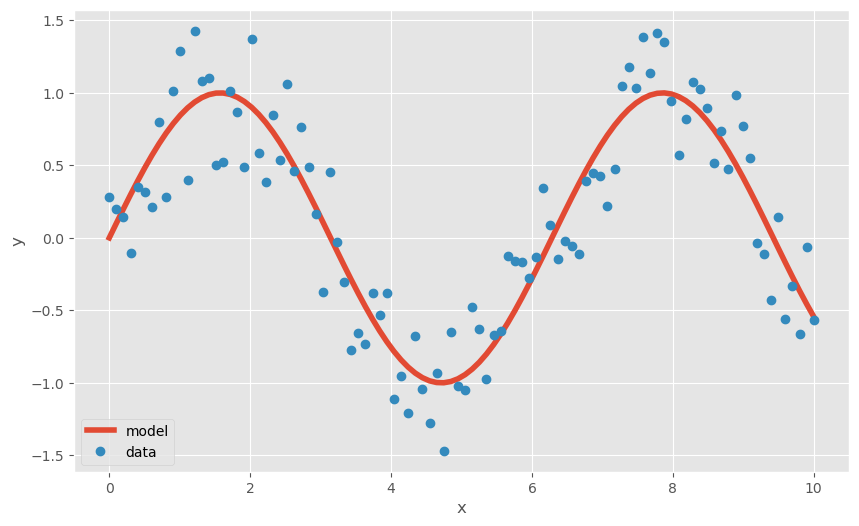

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, linewidth=4, label='model')
plt.plot(x, y_true, 'o', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')

The most straightforward metric to determine how good our model predictions are is the
mean squared error. For each data point, we look at the difference between the predicted
and the actual `y` value, and then square it. We then compute the average of this squared
error over all the data points:

In [70]:
mse = np.mean((y_true - y_pred) ** 2)
mse

0.08531839480842378

For our convenience, scikit-learn provides its own implementation of the mean squared
error:

In [73]:
metrics.mean_squared_error(y_true, y_pred)

0.08531839480842378

Another common metric is to measure the scatter or variation in the data: if every data
point was equal to the mean of all the data points, we would have no scatter or variation in
the data, and we could predict all future data points with a single data value. This would be
the world's most boring machine learning problem. Instead, we find that the data points
often follow some unknown, hidden relationship, that we would like to uncover. In the
previous example, this would be the $y=sin(x)$ relationship, which causes the data to be
scattered.

We can measure how much of that scatter in the data (or **variance**) we can explain. We do
this by calculating the variance that still exists between the predicted and the actual labels;
this is all the variance our predictions could not explain. If we normalize this value by the
total variance in the data, we get what is known as the **fraction of variance unexplained**:

In [76]:
fvu = np.var(y_true - y_pred) / np.var(y_true)
fvu

0.163970326266295

Because this metric is a fraction, its values must lie between 0 and 1. We can subtract this
fraction from 1 to get the fraction of variance explained:

In [79]:
fve = 1.0 - fvu
fve

0.836029673733705

Let's verify our math with scikit-learn:

In [82]:
metrics.explained_variance_score(y_true, y_pred)

0.836029673733705

Spot on! Finally, we can calculate what is known as the coefficient of determination, or $R^2$
(pronounced R squared). $R^2$ is closely related to the fraction of variance explained, and
compares the mean squared error calculated earlier to the actual variance in the data:

In [85]:
r2 = 1.0 - mse / np.var(y_true)
r2

0.8358169419264746

The same value can be obtained with scikit-learn:

In [88]:
metrics.r2_score(y_true, y_pred)

0.8358169419264746

The better our predictions fit the data, in comparison to taking the simple average, the
closer the value of the $R^2$ score will be to 1. The $R^2$ score can take on negative values, as
model predictions can be arbitrarily worse than 1. A constant model that always predicts
the expected value of `y`, independent of the input `x`, would get a $R^2$ score of 0:

In [91]:
metrics.r2_score(y_true, np.mean(y_true) * np.ones_like(y_true))

0.0